In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os

In [3]:
df = pd.DataFrame({'Image_name': [], 'class': [], 'x_center': [], 'y_center': [], 'width': [], 'height': []})

In [4]:
import os
import glob

train_label_dir = "dataset/train/labels"  # Change this to your directory

for file_path in glob.glob(os.path.join(train_label_dir, "*.txt")):
    file_name = os.path.basename(file_path)
    image_name = file_name[:-4] + '.jpg'
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        for line in lines:
            line = line.split(' ')
            class_name = int(line[0])
            x_center = float(line[1])
            y_center = float(line[2])
            width = float(line[3])
            height = float(line[4])
            new_data = pd.DataFrame({'Image_name': [image_name], 'class': [class_name], 'x_center': [x_center], 'y_center': [y_center], 'width': [width], 'height': [height]})
            df = pd.concat([df, new_data], ignore_index=True)
            

In [5]:
df.head()

,Image_name,class,x_center,y_center,width,height
0,00340_119.jpg,1.0,0.649452,0.592723,0.073552,0.063380
1,92 (5).jpg,1.0,0.366784,0.174296,0.132629,0.142019
2,00061_184.jpg,0.0,0.376174,0.250000,0.092723,0.091549
3,82 (5).jpg,1.0,0.454812,0.189554,0.078638,0.073944
4,00123_13.jpg,0.0,0.284624,0.522300,0.245305,0.267606


(256, 192, 3)


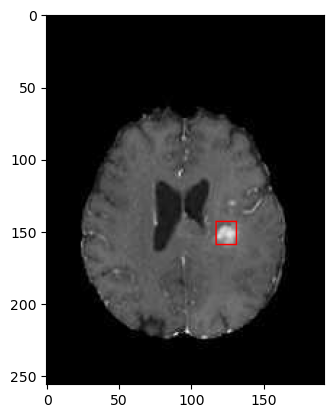

In [6]:
train_image_dir = "dataset/train/images"  # Change this to your directory

for index, row in df.iterrows():
    img = cv.imread(os.path.join(train_image_dir, row['Image_name']))
    print(img.shape)
    x0 = (row['x_center'] - row['width'] / 2) * img.shape[1]
    y0 = (row['y_center'] - row['height'] / 2) * img.shape[0]
    x1 = (row['x_center'] + row['width'] / 2) * img.shape[1]
    y1 = (row['y_center'] + row['height'] / 2) * img.shape[0]
    if row['class'] == 0:
        cv.rectangle(img, (int(x0), int(y0)), (int(x1), int(y1)), (0, 255, 0), 1)
    else:    
        cv.rectangle(img, (int(x0), int(y0)), (int(x1), int(y1)), (0, 0, 255), 1)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    break